<a href="https://colab.research.google.com/github/shravanineeli/ML_Projects/blob/main/Breast_Cancer_Dataset_EDA_Feature_Selection_Modeling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Starter Code

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import recall_score, f1_score, roc_curve, auc
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.linear_model import Lasso
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.decomposition import PCA

# Load the Wisconsin Breast Cancer dataset
data = load_breast_cancer()

# Split the data into features (X) and target variable (y)
X = data.data
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 95.61%


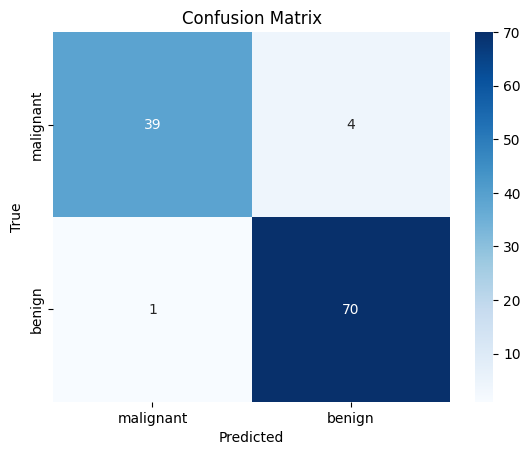

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

In [ ]:
# Calculate the F1 score
f1 = f1_score(y_test, y_pred, average='macro')  # Use 'macro' for multi-class classification
print("F1 Score:", f1)

F1 Score: 0.9526381387619444


## Analysis of Baseline Model

The baseline model has an accuracy of 95.61%, where it is predicting 4 out of 114 as False Benign.

Moving forward, the report will focus on performing Data Exploration, Univariate, Bivariate, and Multivariate Analysis, along with K-Best and LASSO in order to improve the model's accuracy so that we can achieve fewer False Benign predictions.

# Data Exploration

### Creating a Dataframe

In [ ]:
# Creating a df in order to perform data exploration
bcancer_df = pd.DataFrame(data.data, columns=data.feature_names)

# Adding the target column to the DataFrame
bcancer_df['target'] = data.target

We have to create a dataframe in order to perform EDA and build visualizations.

### Dataset Information

In [ ]:
# Display the dataset information
print("Breast Cancer Dataset:")
print("-------------------------------")
print("Target Names:", data.target_names)
print("Feature Names:", data.feature_names)
print("Data Shape:", data.data.shape)
print("Target Shape:", data.target.shape)

Breast Cancer Dataset:
-------------------------------
Target Names: ['malignant' 'benign']
Feature Names: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Data Shape: (569, 30)
Target Shape: (569,)


Through this dataset information, we notice that we have 30 features, along with a categorical target of Malignant and Benign. This gives us an understanding that moving forward we will have to perform a Logistic Regression as the target variable is categorical.

We can also confirm that the features and target have the same amount of rows.

### Missing Values

In [ ]:
# Check for missing values
bcancer_df.isnull().sum()

,0
mean radius,0
mean texture,0
mean perimeter,0
mean area,0
mean smoothness,0
mean compactness,0
mean concavity,0
mean concave points,0
mean symmetry,0
mean fractal dimension,0


Through the missing values calculation, we can notice that there are no missing values present in any of the feature as well as the target.

### Data Types

In [ ]:
bcancer_df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


In [ ]:
# Changing target from integer to categorical
bcancer_df['target'] = bcancer_df['target'].astype('category')

In [ ]:
bcancer_df.dtypes

,0
mean radius,float64
mean texture,float64
mean perimeter,float64
mean area,float64
mean smoothness,float64
mean compactness,float64
mean concavity,float64
mean concave points,float64
mean symmetry,float64
mean fractal dimension,float64


Through the data types, we notice that all the features are floats and there is nothing to be changed as they are all accurate.

We also notice that the target is saved as an integer, this is not accurate as the target is a category which is saved as 0s and 1s. Hence, we have changed its data type.

# Univariate Analysis

## Class Distribution

In [ ]:
# Define the target mapping
target_mapping = {0: "Malignant", 1: "Benign"}

# Create a copy of the original DataFrame and apply the mapping to the target column
bcancer_df2 = bcancer_df.copy()
bcancer_df2['target'] = bcancer_df2['target'].map(target_mapping)

# Check the class distribution with the new target names
class_distribution = bcancer_df2['target'].value_counts()

print("Total number of diagnoses are ", str(bcancer_df2.shape[0]))
print("\nClass Distribution:")
print(class_distribution)

Total number of diagnoses are  569

Class Distribution:
target
Benign       357
Malignant    212
Name: count, dtype: int64


### Analysis of Class Distribution

Through the class distribution, we notice that there are 357 diagnoses of Benign and 212 diagnoses of Malignant. The total number of diagnoses are 569, which is the same number as the total rows in the dataset.

This is a good sign, as there are no instances of undiagnosed cases in the dataset.

## Data Describe

In [ ]:
bcancer_df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


### Analysis of Data Describe

Through the data describe, we can have quick look at the stats of the entire dataset.

Firstly, we can notice that the count of all features is the same, this helps reconfirm that there are no missing values in the dataset. We can also analyze the distribution of features through the mean, std, and the quartiles; however, we will not be doing that right now as it is easier to analyze that with visualizations such as histograms and boxplots.

## Histograms

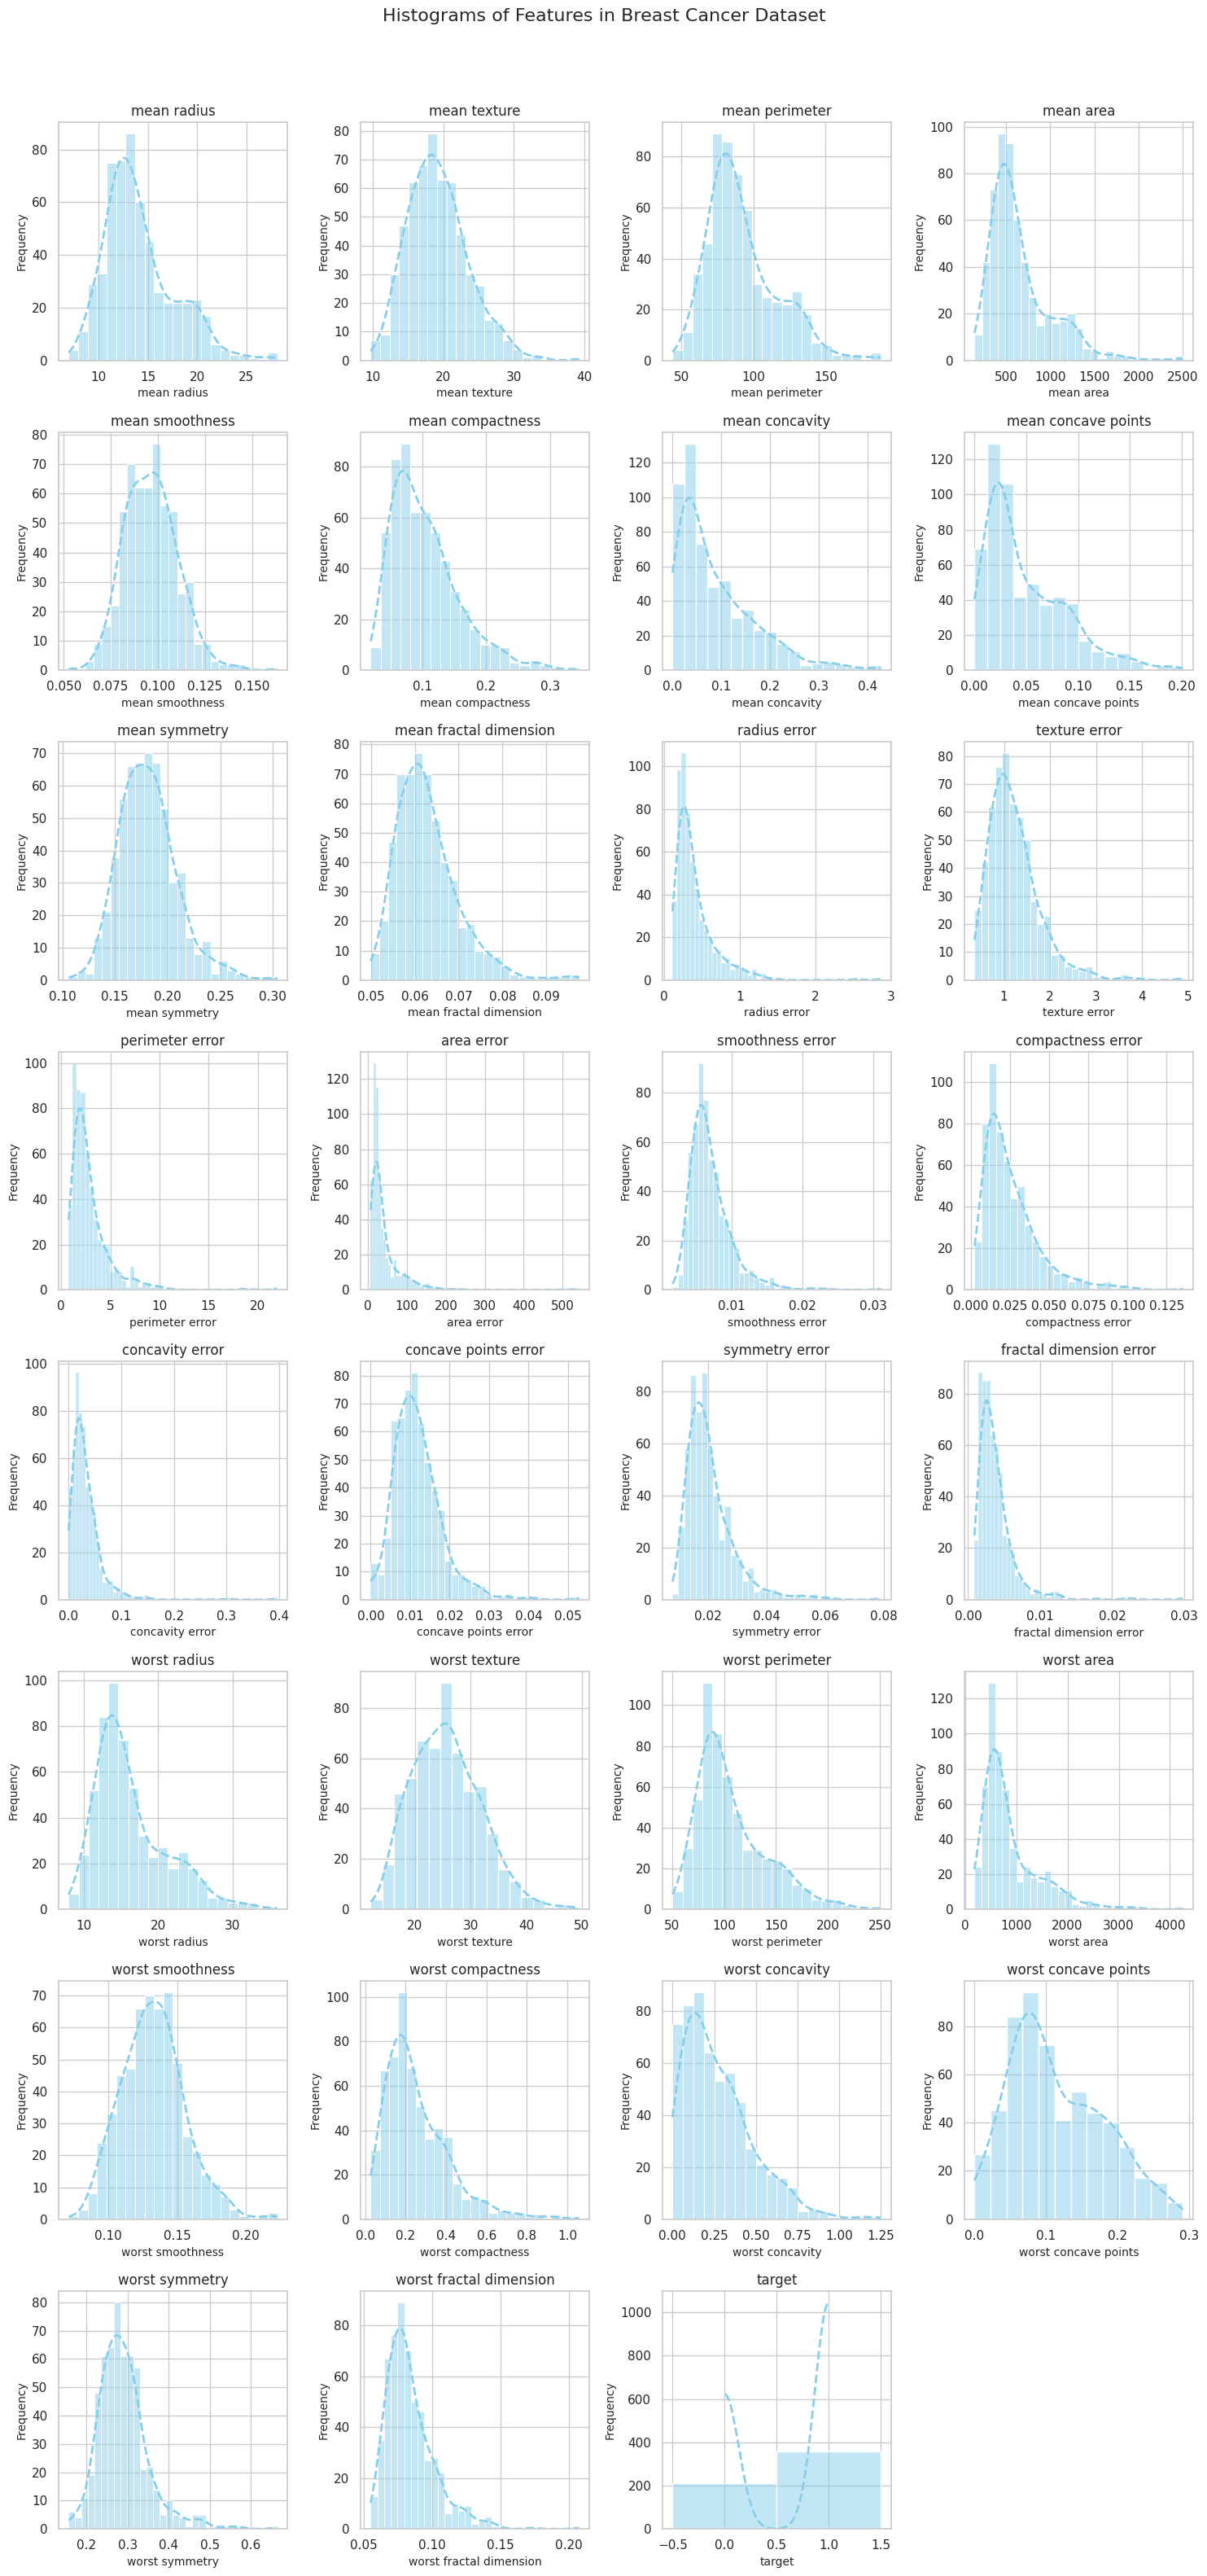

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Number of columns
num_cols = bcancer_df.shape[1]

# Create a figure with subplots for each column
fig, axes = plt.subplots(nrows=num_cols//4 + 1, ncols=4, figsize=(15, num_cols * 1))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column to create a histogram
for i, col in enumerate(bcancer_df.columns):
    sns.histplot(bcancer_df[col], kde=True, ax=axes[i], color='skyblue', line_kws={"linestyle": '--', "linewidth": 2})

    # Set labels
    axes[i].set_title(f'{col}', fontsize=12)
    axes[i].set_xlabel(f'{col}', fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)

# Remove empty subplots (in case num_cols is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle('Histograms of Features in Breast Cancer Dataset', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

### Analysis of Histograms

1. Normal Distribution:
   - mean radius
   - mean texture
   - mean perimeter
   - mean compactness
   - mean concavity
   - mean concave points
   - concavity error
   - concave points error
   - worst radius
   - worst texture
   - worst perimeter
   - worst smoothness
   - worst compactness
   - worst concavity
   - worst concave points
   - worst fractal dimension

2. Exponential Decay:
   - mean area
   - radius error
   - perimeter error
   - area error
   - compactness error
   - smoothness error
   - texture error
   - fractal dimension error
   - worst area
   - worst symmetry

- Through the normal and exponential decay histograms, we notice that there are no bi-modal distributions present in the dataset. This is fascinating as it suggests that a benign as well as a malignant tumor have similar means and modes.


3. Target:
   - This histogram shows only two bars which represent the target classification, Malignant and Bengin. Through the histogram, we can see that it is not a uniform distrbution, which is logical as we had earlier observed more cases of Benign in the dataset than Malignant.

## Boxplots

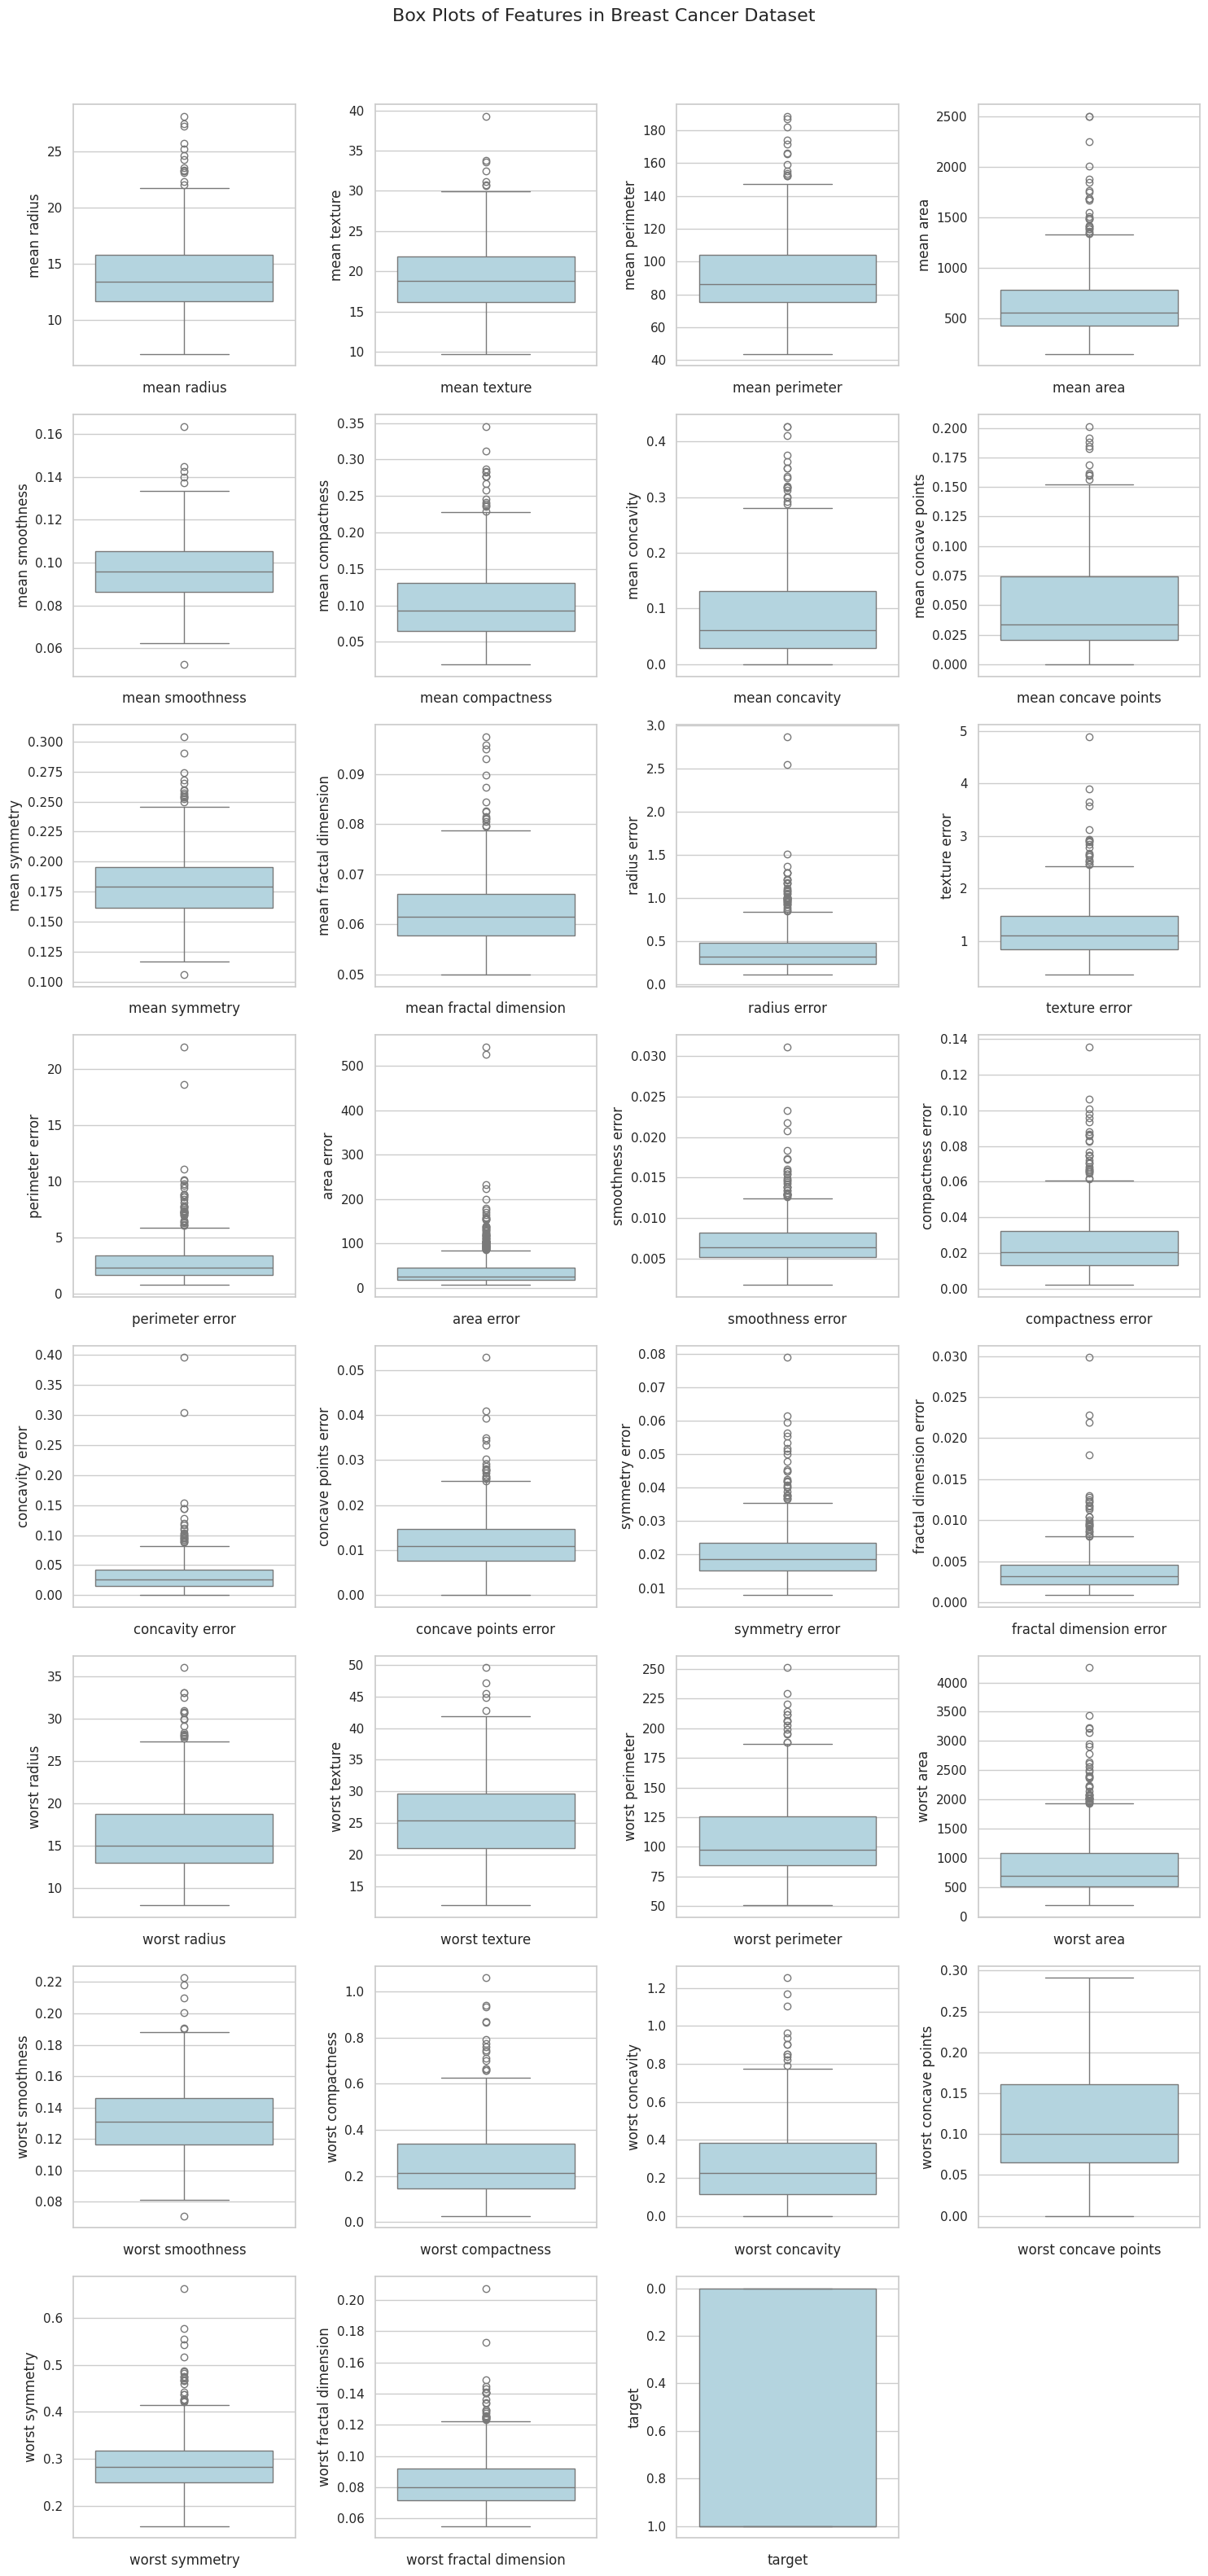

In [ ]:
# Set up the plotting style
sns.set(style="whitegrid")

# Number of columns
num_cols = bcancer_df.shape[1]

# Create a figure with subplots for each column (adjusting figsize for smaller width)
fig, axes = plt.subplots(nrows=num_cols//4 + 1, ncols=4, figsize=(15, num_cols * 1))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Loop through each column to create a box plot
for i, col in enumerate(bcancer_df.columns):
    sns.boxplot(data=bcancer_df, y=col, ax=axes[i], color='lightblue')

    # Set labels
    axes[i].set_xlabel(f'{col}', fontsize=12)

# Remove empty subplots (in case num_cols is not a multiple of 3)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Set the overall title for the figure
fig.suptitle('Box Plots of Features in Breast Cancer Dataset', fontsize=16, y=1.02)

# Adjust layout
plt.tight_layout()
plt.show()

### Analysis of Boxplots

- There are outliers present in all features of the dataset, except for the feature 'worst concave points'. We will not be removing any of the outliers, as we will be using the entire dataset to build the models.

- The outliers are a sign of high variance present in all the features of the datset.

# Correlation Matrix

## Full Correlation Matrix

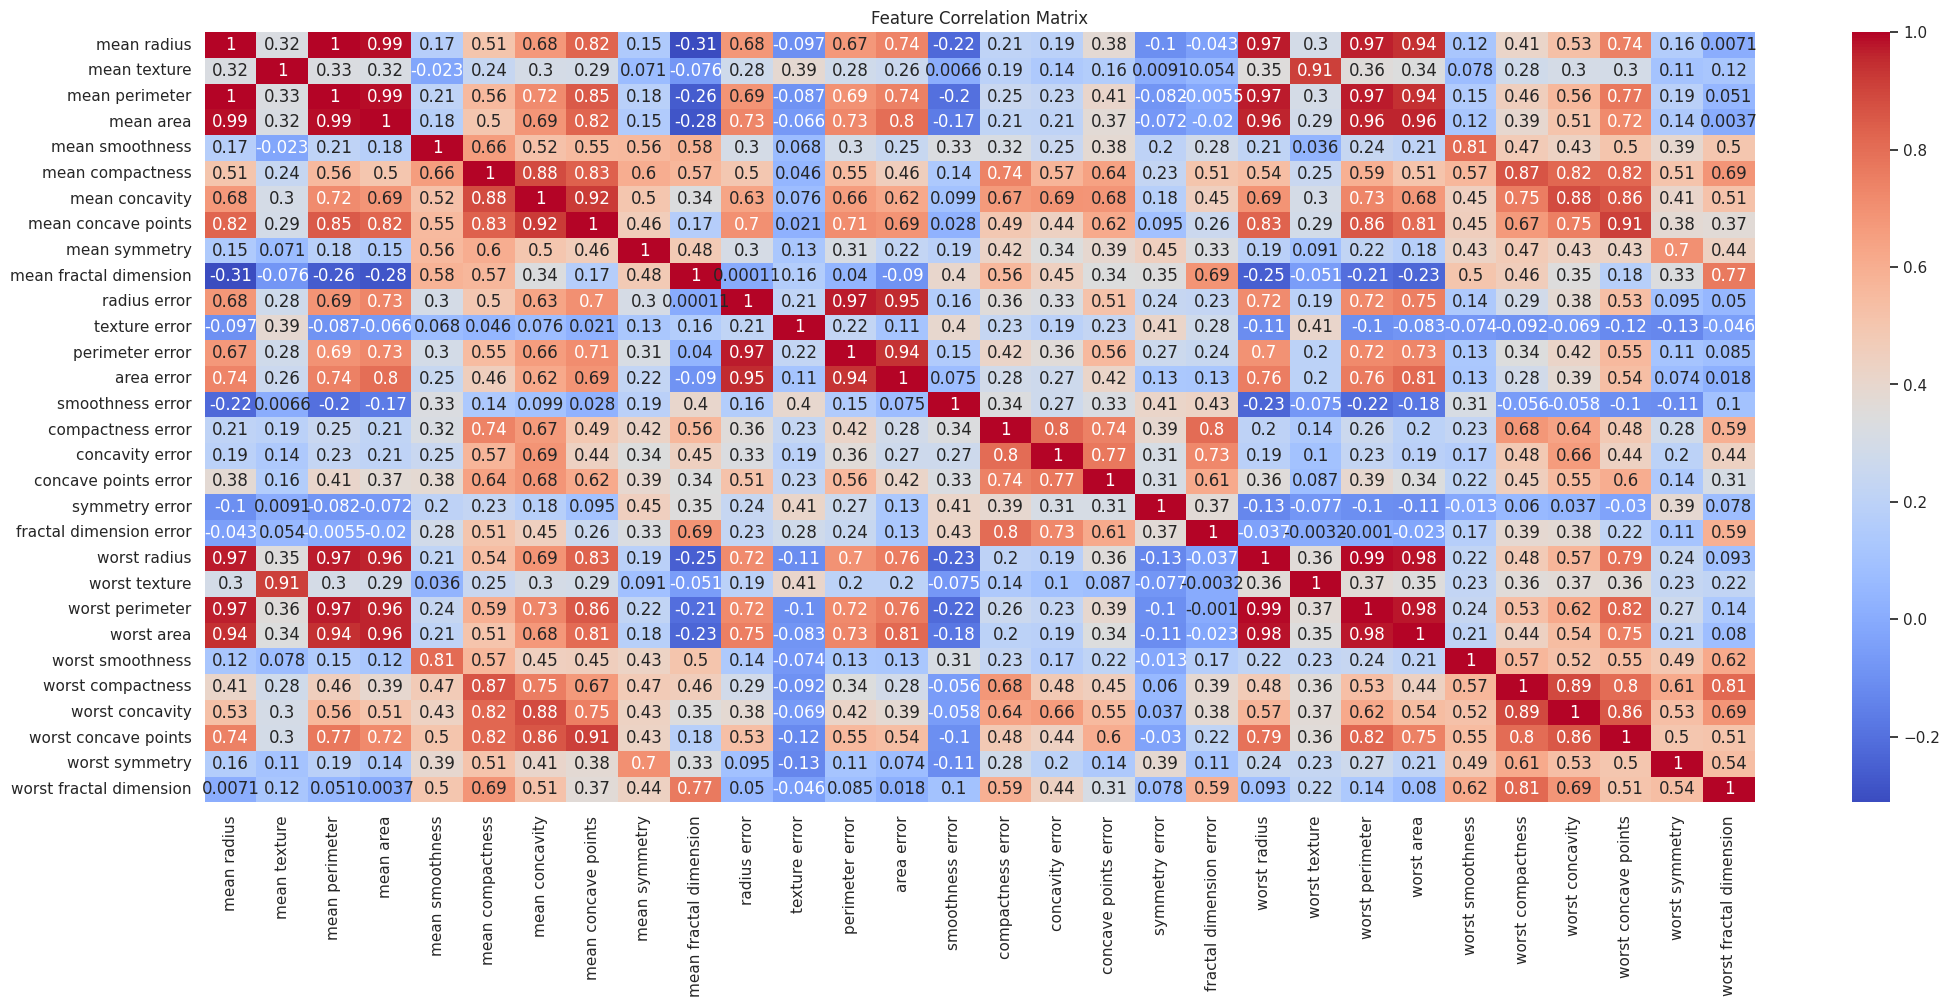

In [ ]:
# Create the correlation matrix for only numerical columns
numerical_df = bcancer_df.select_dtypes(include=['number'])
correlation_matrix = numerical_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(25, 10))

# Create the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm")

# Set title
plt.title("Feature Correlation Matrix")

# Show plot
plt.show()

Due to the high number of features in the dataset, the heatmap of the correlation matrix appears too messy and crowded to look at.


Hence, another heatmap with just the lower triangle of the correlation matrix will be created. This will allow the heatmap to be easier to look at, and will also reduce redundancy of information.

## Lower Triangle of Correlation Matrix

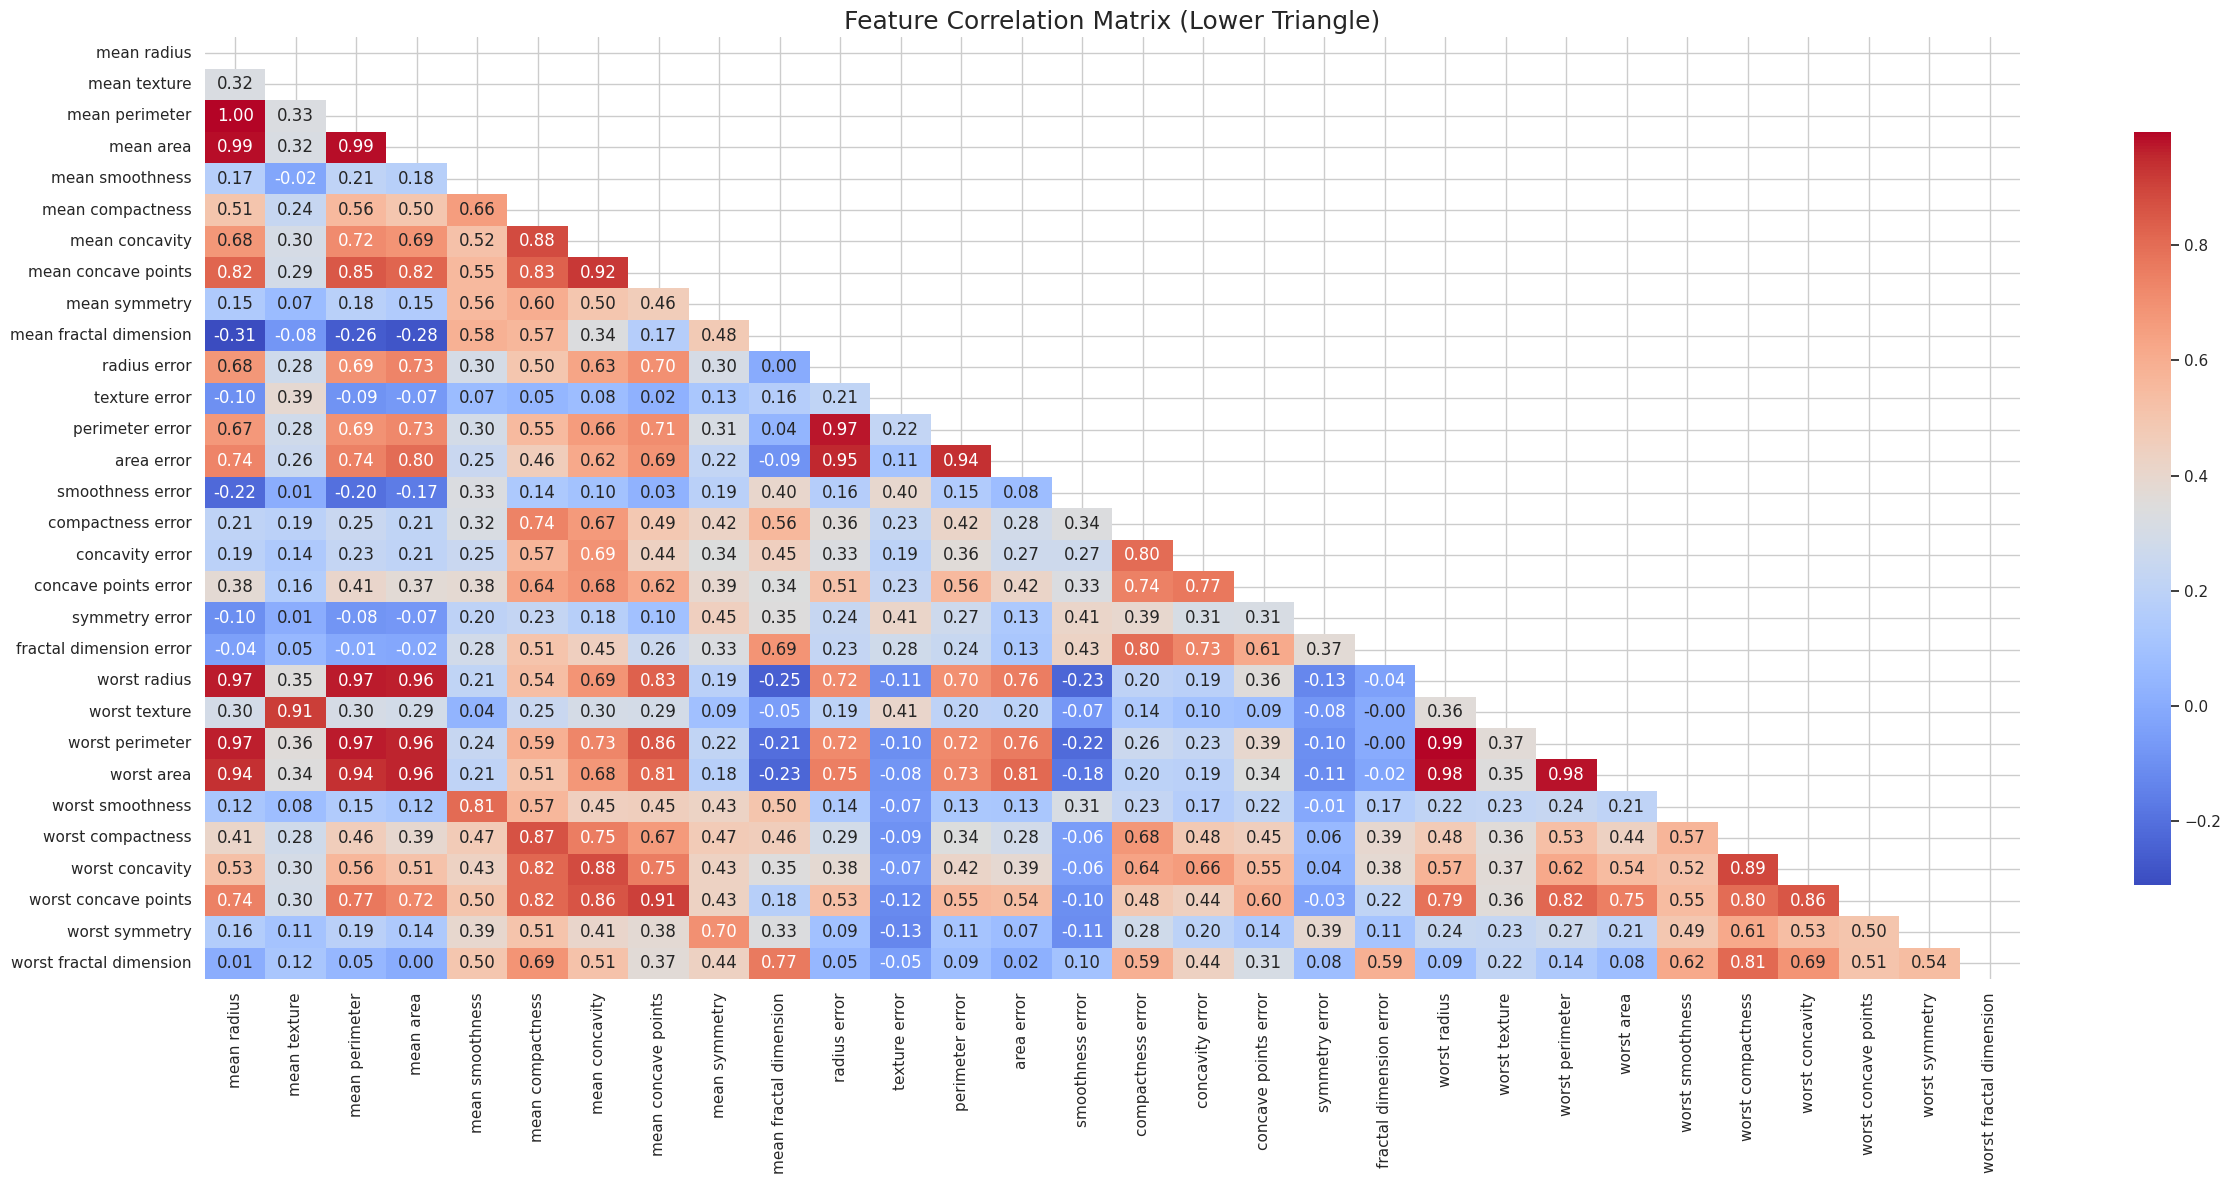

In [ ]:
# Set up the matplotlib figure
plt.figure(figsize=(25, 12))

# Create a mask for the upper triangle (since correlation matrix is symmetric)
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Create the heatmap with mask and without gridlines
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap="coolwarm",
            linewidths=0, fmt=".2f", cbar_kws={"shrink": .8})

# Set title
plt.title("Feature Correlation Matrix (Lower Triangle)", fontsize=18)

# Show plot
plt.tight_layout()
plt.show()

### Analysis of Correlation Matrix

Top 5 Positive Correlations:
1. Mean radius and Mean perimeter (0.99):
   
   The very high positive correlation suggests that as the radius of the cells increases, the perimeter also tends to increase in a linear manner. This makes sense, as perimeter generally grows proportionally to radius in spherical or near-spherical shapes, which is the shape of the tumor.
   
2. Mean area and Mean perimeter (0.99):  
   
   A large mean area is closely associated with a large perimeter. This high correlation indicates that when the area of the cell increases, its perimeter increases as well or vice versa.

3. Mean area and Mean radius (0.99):  
   
   This high positive correlation makes sense, as changes in radius will also lead to changes in area, due to the formula for the calculation of area which also includes the radius.

4. Worst radius and Worst perimeter (0.98):
   
   Similar to the mean radius and perimeter, the worst (largest) measurements of radius and perimeter show a high correlation, suggesting these worst-case metrics are closely related for larger cell structures.

5. Worst area and Worst perimeter (0.98):
   
   Just like with the mean area and mean perimeter, worst area and perimeter are also highly correlated, suggesting that cells with larger worst-case areas also tend to have larger perimeters.

Top 5 Negative Correlations:
1. Worst radius and Mean fractal dimension (-0.46):
   
   This is the strongest negative correlation in the matrix. It suggests that tumors with a larger "worst radius" (the largest measured size of the tumor) tend to have a lower mean fractal dimension.

2. Worst perimeter and Mean fractal dimension (-0.46):
   
   Similar to the relationship between worst radius and mean fractal dimension, tumors with a larger worst perimeter are associated with a lower mean fractal dimension, implying that larger tumors have less complex shapes.

3. Worst area and Mean fractal dimension (-0.46):
   
   Tumors with a larger worst area (the largest measured area of the tumor) also tend to have lower mean fractal dimension values. Again, this indicates that larger tumors tend to have smoother, less complex boundaries.

4. Worst texture and Radius error (-0.25):
   
   A negative correlation here suggests that tumors with higher variability in texture (a measure of the variation in gray levels within the tumor) tend to have lower variability in radius measurements. Tumors with rougher textures are less likely to show fluctuating sizes in their measured radius.

5. Worst radius and Mean fractal dimension error (-0.25):
   
   Tumors with a larger worst radius also have lower fractal dimension error, suggesting that larger tumors tend to have more stable (less variable) boundary complexities.

# Multivariate Analysis

## Mean Radius vs Mean Area colored by Benign or Malignant

Hypothesis:

The high correlation between Mean Radius and Mean Area can be utilized as a classification for Benign or Malignant tumors.

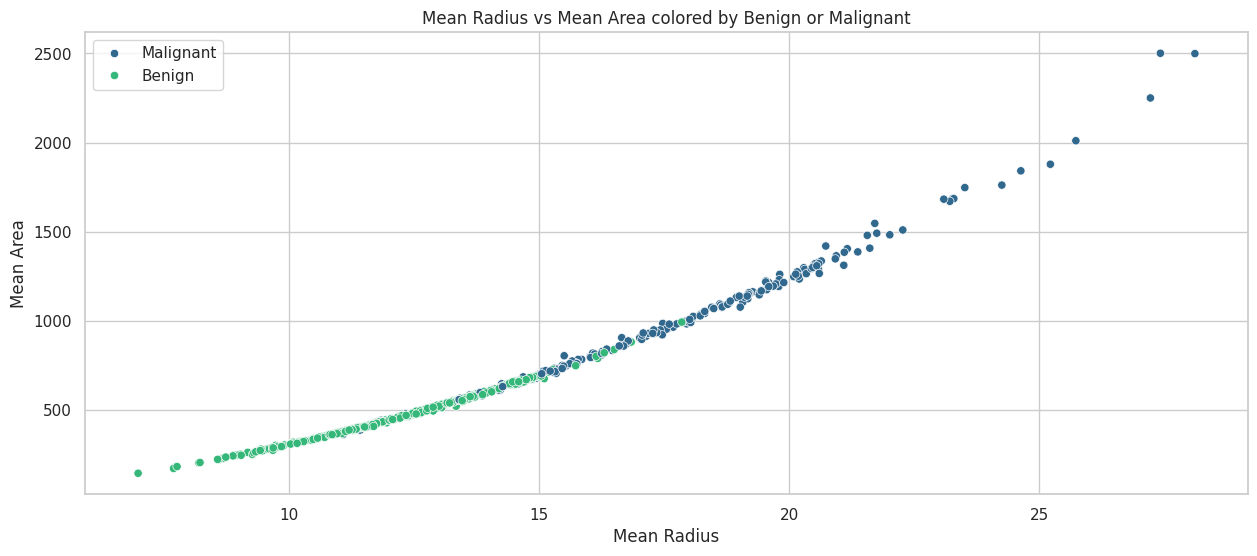

In [ ]:
# Mean radius vs Mean area colored by Benign or Malignant
plt.figure(figsize=(15, 6))
sns.scatterplot(x=bcancer_df['mean radius'], y=bcancer_df['mean area'], hue=bcancer_df2['target'], palette='viridis')
plt.title('Mean Radius vs Mean Area colored by Benign or Malignant')
plt.xlabel('Mean Radius')
plt.ylabel('Mean Area')
plt.legend(title=None)
plt.show()

### Analysis of Mean Radius vs Mean Area colored by Benign or Malignant

This hypothesis is true, as there is a visible classification of Benign or Malignant as mean radius and mean area either increase or decrease.

However, these two variables are not entirely accurate classifiers as there is heavy overlap of colors at certain areas of the chart.

## Mean Perimeter vs Worst Concave Points colored by Benign or Malignant

Hypothesis:

The high correlation between Mean Perimeter and Worst Concave Points can be utilized as a classifier for Benign or Malignant tumors.

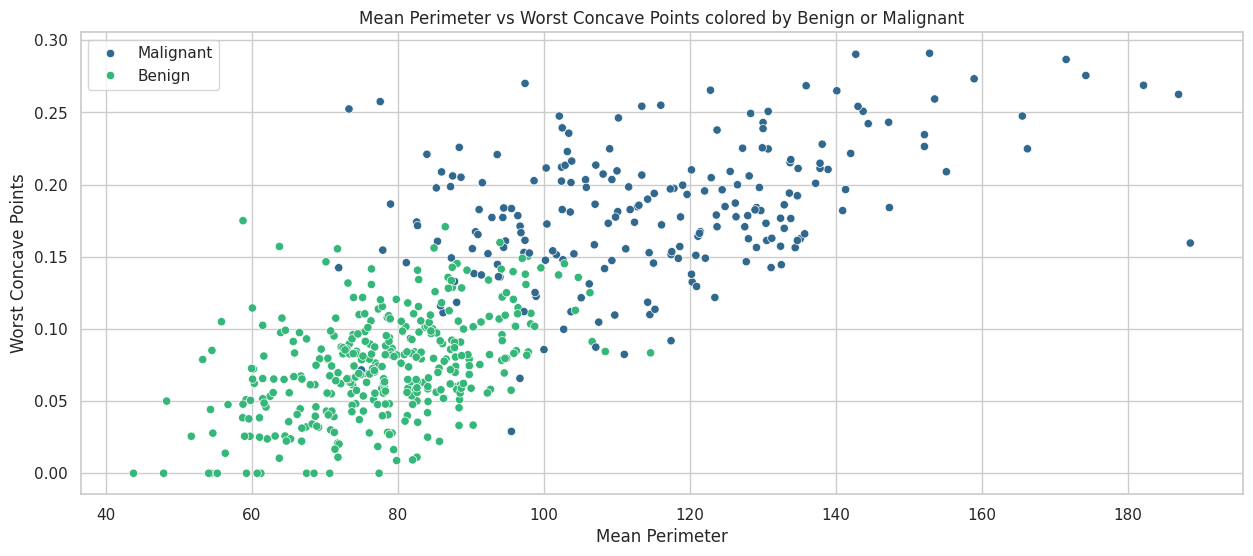

In [ ]:
# Mean perimeter vs Worst concave points colored by Benign or Malignant
plt.figure(figsize=(15, 6))
sns.scatterplot(x=bcancer_df['mean perimeter'], y=bcancer_df['worst concave points'], hue=bcancer_df2['target'], palette='viridis')
plt.title('Mean Perimeter vs Worst Concave Points colored by Benign or Malignant')
plt.xlabel('Mean Perimeter')
plt.ylabel('Worst Concave Points')
plt.legend(title=None)
plt.show()

### Analysis of Mean Perimeter vs Worst Concave Points colored by Benign or Malignant

This hypothesis is true, as there is a visible classification of Benign or Malignant as worst concave points and mean perimeter either increase or decrease.

However, it can be noticed that Mean Perimeter vs Worst Concave Points do not have a strong correlation, as the data points are quite spread out.

# KBest

We will be creating KBest with k = 24, k = 16, k = 8, and k = 1; in order to look at which segment to focus on.

This will done to avoid having to create approximately 30 KBest calculation as it is redunant.

## k = 24

In [ ]:
k = 24
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean compactness', 'mean concavity', 'mean concave points', 'mean symmetry', 'radius error', 'perimeter error', 'area error', 'compactness error', 'concavity error', 'concave points error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst smoothness', 'worst compactness', 'worst concavity', 'worst concave points', 'worst symmetry', 'worst fractal dimension']
Accuracy: 96.49%


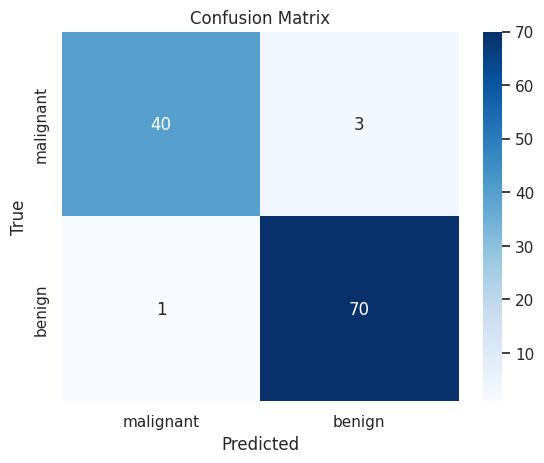

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 16

In [ ]:
k = 16
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'mean concave points', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
Accuracy: 96.49%


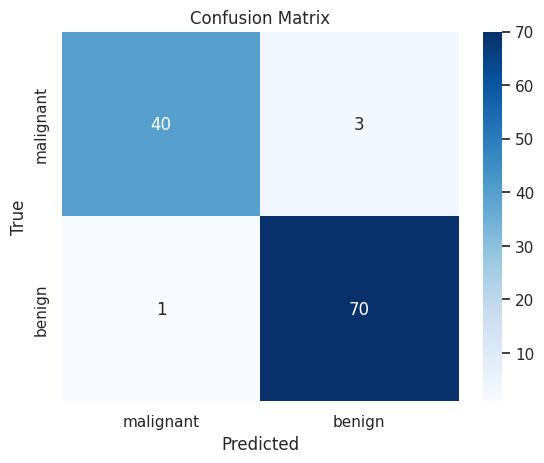

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 8

In [ ]:
k = 8
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 97.37%


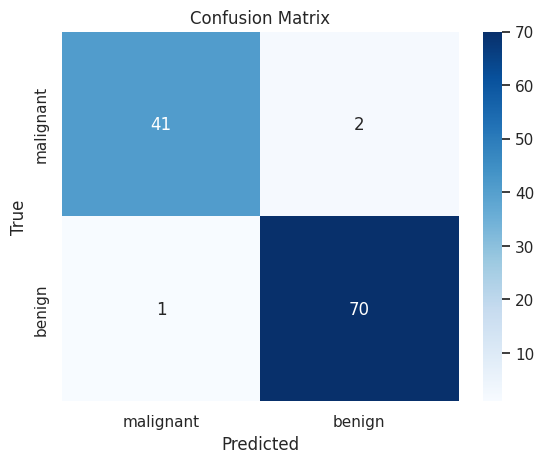

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 1

In [ ]:
k = 1
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['worst area']
Accuracy: 93.86%


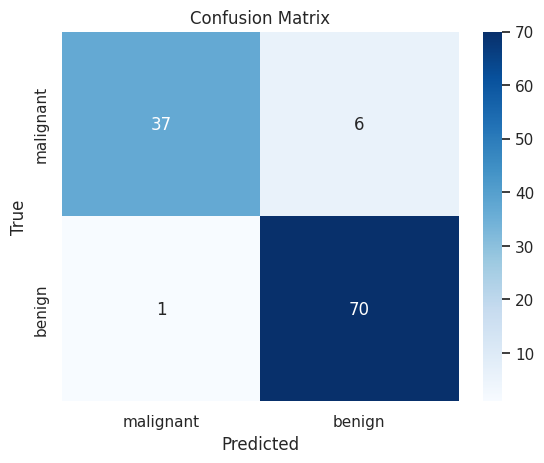

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of K-Best

- k = 24 and k = 16 have the same accuracy of 96.49% along with 3 false negatives. This suggests that k = 16 is better since it has the same accuracy with fewer features. Hence, this segment will not be focused on.

- k = 16 and k = 8 has a change in accuracy, where k = 8 has 97.37% accuracy with 2 false negatives. This suggests that k = 8 is a better model as it has better accuracy, lower false negatives, and fewer features.

- k = 8 and k = 1 has a change in accuracy as well, where k = 1 has lower accuracy of 93.86% with 6 false negatives. This suggests that k = 1 is a worse model. Hence, this segment will also not be focused on.

- Therefore, only the segment k = 16 and k = 8 will be focused on.

# Segment 16 - 8

## k = 15

In [ ]:
k = 15
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity', 'worst concave points']
Accuracy: 96.49%


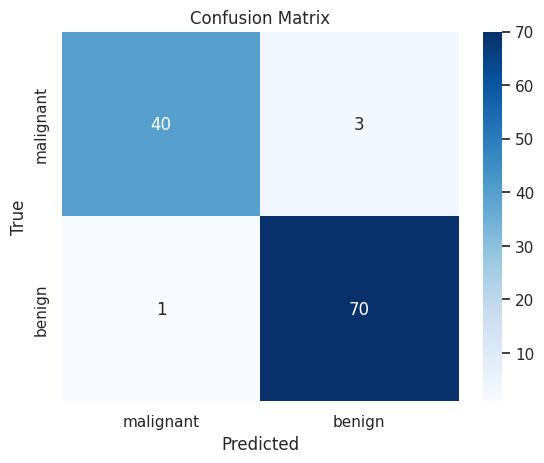

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 14

In [ ]:
k = 14
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst compactness', 'worst concavity']
Accuracy: 96.49%


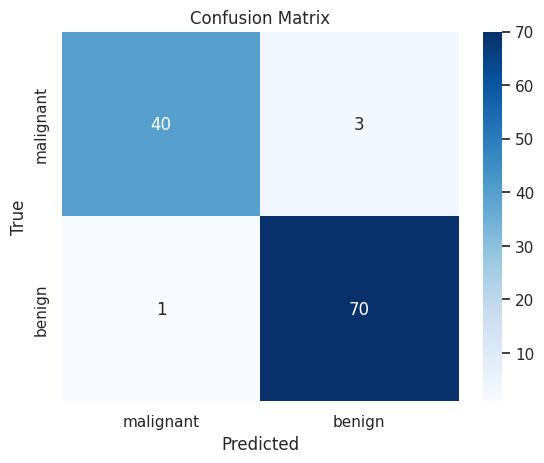

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 13

In [ ]:
k = 13
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'mean concavity', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 96.49%


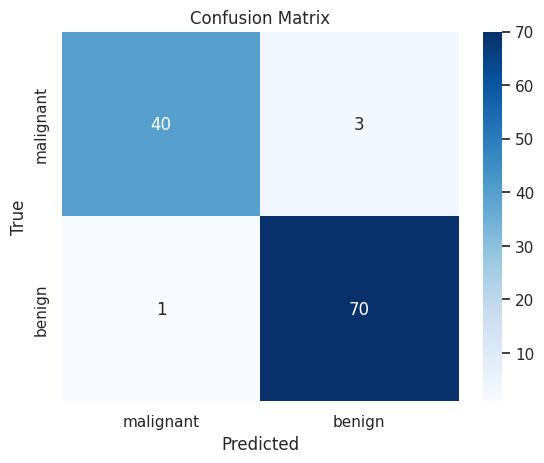

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 12

In [ ]:
k = 12
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'radius error', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 96.49%


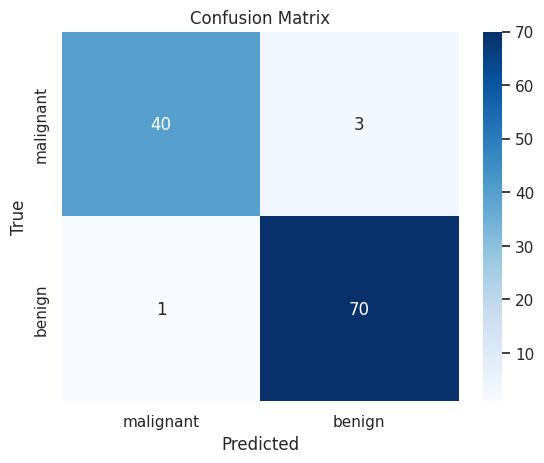

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 11

In [ ]:
k = 11
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area', 'worst concavity']
Accuracy: 96.49%


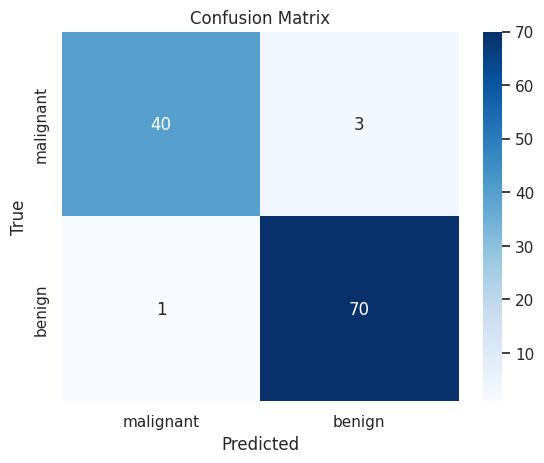

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 10

In [ ]:
k = 10
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean texture', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 96.49%


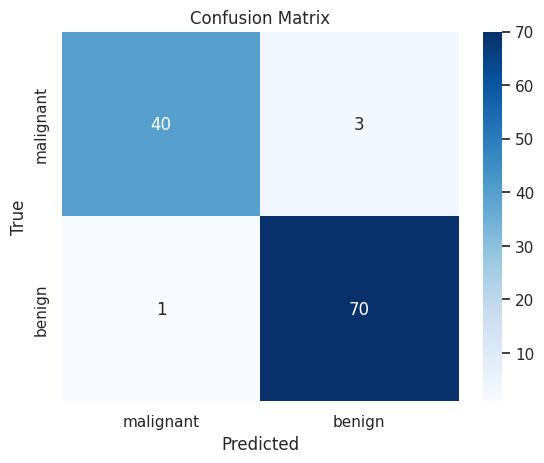

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 9

In [ ]:
k = 9
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'perimeter error', 'area error', 'worst radius', 'worst texture', 'worst perimeter', 'worst area']
Accuracy: 96.49%


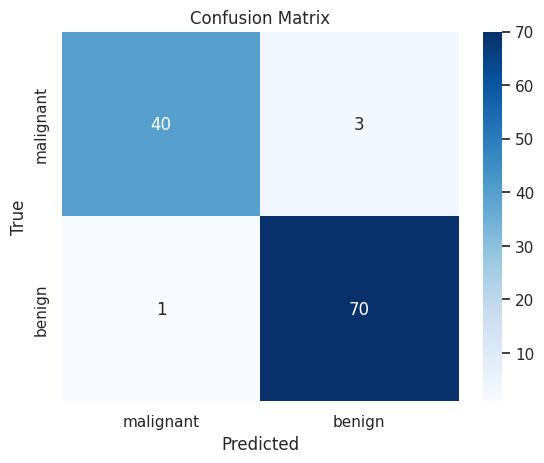

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of K-Best from 15 - 9

- All the models between k = 15 and k = 9 appear to be worse off than k = 8, as they use more features and also have worser accuracy with more false negatives.

- Hence, we will also be looking at k = 7 and k = 6 to see if they are better than k = 8.

# Segment 6 - 8

## k = 7

In [ ]:
k = 7
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean radius', 'mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 97.37%


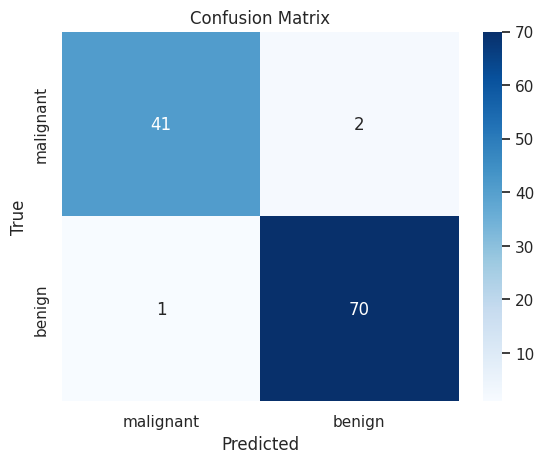

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## k = 6

In [ ]:
k = 6
selector = SelectKBest(score_func=chi2, k=k)
X_new = selector.fit_transform(X, y)

selected_indices = selector.get_support(indices=True)
selected_feature_names = [data.feature_names[i] for i in selected_indices]

print("Selected Features:", selected_feature_names)

X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Selected Features: ['mean perimeter', 'mean area', 'area error', 'worst radius', 'worst perimeter', 'worst area']
Accuracy: 97.37%


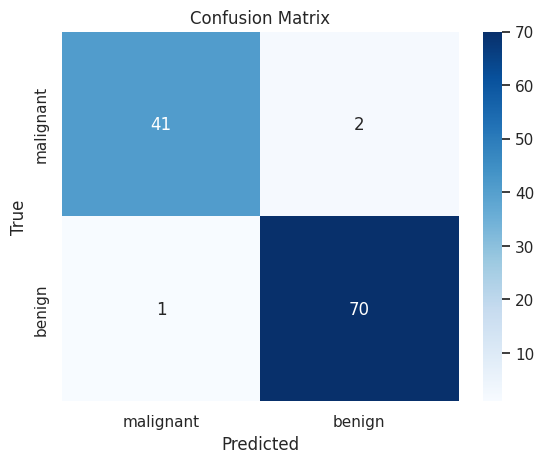

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of K-Best 7 and 6

- k = 6 is a better model than k = 8, as it has the same accuracy with the same number of false negatives with fewer features.
- k = 7 is the best model so far, as it has a higher accuracy of 98.25%, and only 2 false negatives.
- Therefore, the best features are mean radius, mean perimeter, mean area, area error, worst radius, worst perimeter, and worst area.
- These features have the highest causal power compared to the rest, as they help the model improve its accuracy and predict fewer false negatives.

# LASSO

## 5% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.05)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## 6% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.06)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## 7% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.07)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## 8% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.06)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## 9% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.09)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## 10% Alpha

In [ ]:
# Apply LASSO regression
lasso = Lasso(alpha=0.1)  # Set the regularization strength (alpha) according to your needs
lasso.fit(X,y)

# Get the non-zero coefficients and their corresponding feature names
non_zero_coefficients = lasso.coef_
feature_names = data.feature_names

# Retrieve the selected features
selected_features = [feature_names[i] for i, coef in enumerate(non_zero_coefficients) if coef != 0]

# Print the selected features
print("Selected Features:", selected_features)

Selected Features: ['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']


## Regression with LASSO Selected Features

In [ ]:
# Split the data into features (X) and target variable (y)
X = bcancer_df[['mean area', 'area error', 'worst texture', 'worst perimeter', 'worst area']]
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 96.49%


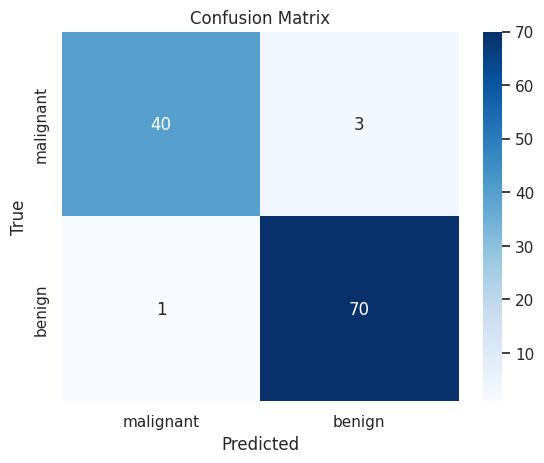

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of LASSO Model

- Through alpha 5% till alpha 10%, the selected features remained the same. The selected features were mean area, area error, worst texture, worst perimeter, and worst area.

- Anything above alpha 10% will not be explored, as the model accuracy will be lower as the alpha increases since the alpha represents the level of error.

- These features were utilized to create a model, which had the better results as the baseline at 96.49%. Hence, the LASSO model is better than the baseline as it uses fewer features, 5 instead of 30, to obtain better accuracy with fewer false negatives.

# Overall Comparison of K-Best and LASSO Models

- The k = 7 and LASSO model outperform the baseline, since they have better accuracy with fewer features.

- The k = 7 model is better than the LASSO model, as it has a better accuracy and predicts fewer false negatives.

- The features that were in k = 7 but not in the LASSO selected features were mean radius, mean perimeter, and worst radius. These features could be intepreted as the most important features in the dataset, as they cause the k = 7 to perform better than the LASSO model. Therefore, we could also say that these features have high causal power compared to the rest.

- We will now build a model with only these 3 features to see whether the hypothesis of these features having the highest causal power is true.

# Model with Mean Radius, Mean Perimeter, and Worst Radius

In [ ]:
# Split the data into features (X) and target variable (y)
X = bcancer_df[['mean radius', 'mean perimeter', 'worst radius']]
y = data.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression(max_iter=10000)
model.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 98.25%


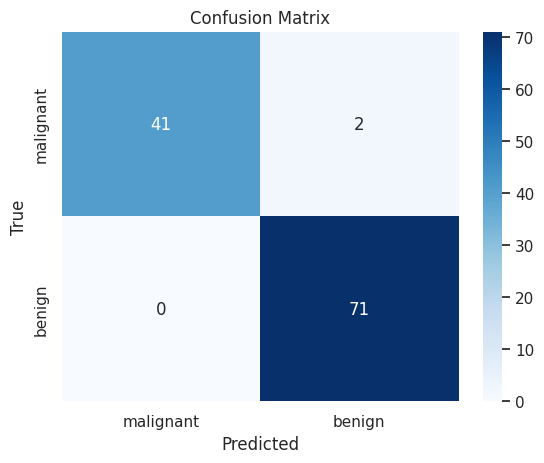

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of Model with Mean Radius, Mean Perimeter, and Worst Radius

- This model has an accuracy of 98.25%, and 2 false negatives being predicted. These results are the same k = 7, which was earlier identified as the best model so far.

- Since this model is built with only 3 features and has the same accuracy as k = 7, this model is better.

- Hence, the hypothesis that these 3 feature have the highest causal power is true; and this is the best model in this entire report.

# PCA

In [ ]:
X = bcancer_df.drop('target', axis=1)
y = bcancer_df['target']

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Perform PCA with 3 components
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(data=pca_result, columns=['PC1', 'PC2'])
pca_df['target'] = y

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
print("Explained variance ratio:", explained_variance_ratio)

component_weights = pd.DataFrame(data=pca.components_,
                                 columns=data.feature_names,
                                 index=['PC1', 'PC2'])

print(component_weights)

Explained variance ratio: [0.44272026 0.18971182]
     mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
PC1     0.218902      0.103725        0.227537   0.220995         0.142590   
PC2    -0.233857     -0.059706       -0.215181  -0.231077         0.186113   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
PC1          0.239285        0.258400             0.260854       0.138167   
PC2          0.151892        0.060165            -0.034768       0.190349   

     mean fractal dimension  ...  worst radius  worst texture  \
PC1                0.064363  ...      0.227997       0.104469   
PC2                0.366575  ...     -0.219866      -0.045467   

     worst perimeter  worst area  worst smoothness  worst compactness  \
PC1         0.236640    0.224871          0.127953           0.210096   
PC2        -0.199878   -0.219352          0.172304           0.143593   

     worst concavity  worst concave points  worst symmetry  \
PC1  

In [ ]:
X = pca_df[['PC1', 'PC2']]
y = pca_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 99.12%


## Confusion Matrix

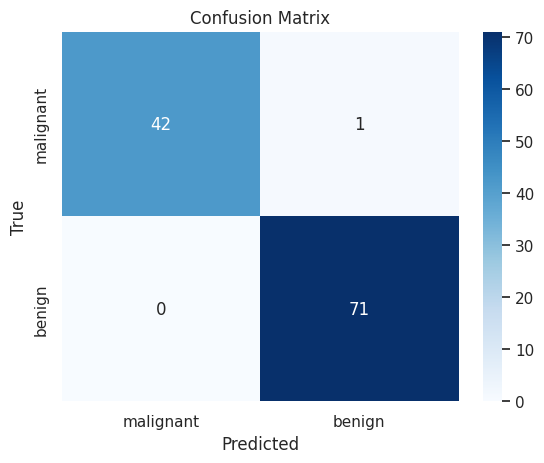

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of PCA Model

After looking at the component weights, I realized that for PC1 the main component is 'mean concave points' and for PC2 the main component is 'mean fractal dimension'.

This allowed me to target other features except for these in order to have 0 malignant tumors being predicted as benign tumors.

# PCA and 1 more features

In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df)

# Perform PCA and get PC1 and PC2
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

# Create a DataFrame for PCA results
pca_df = pd.DataFrame(pca_result, columns=['PC1', 'PC2'])

# Select features: PC1, PC2, and new relevant features
X = pd.DataFrame({
    'PC1': pca_df['PC1'],
    'PC2': pca_df['PC2'],
    'texture error': df['texture error']
})

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the Decision Tree Classifier
tree_model = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split=4)  # Tune parameters
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 97.37%


## Confusion Matrix

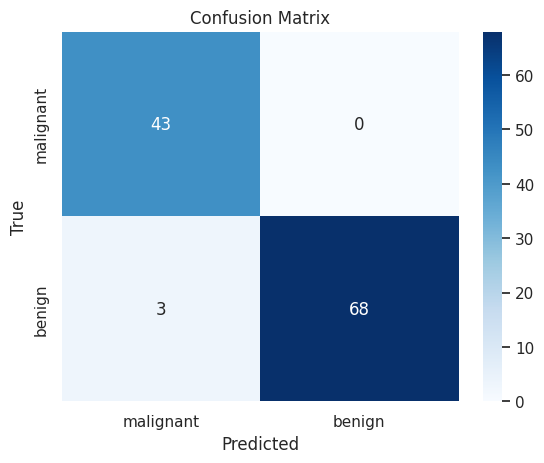

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix as a heatmap
labels = data.target_names
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=labels, yticklabels=labels)

# Set labels and title
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')

# Show the plot
plt.show()

## Analysis of PCA and Texture Error Model

After a lot of trail and error, I was able to determine that 'texture error' was the feature need to have 0 malignant tumors being predicted as benign.